# Linear Regression Assignment

__Submitted by:__ Janarthanan Balasubramanian (jnvdasa@gmail.com)

__Client:__ Geely Auto (a Chinese Automobile Company)


## Business Understanding

Geely Auto wants to enter the US market and wants to understand the factors on which the pricing of the cars in the American market depends on. This Chinese Automobile company wants to know:
 - Which variables are significant in predicting the price of a car
 - How well those variables describe the price of a car

They have provided the dataset of different types of cars across the American market. __The objective is to model the price of cars with the available independent variables.__ 

The company is planning to set up their manufacturing unit in America to produce cars locally. So it is important to understand the impact of these variables on the car prices, so that they can manipulate the design of the cars accordingly to meet certain price levels. 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from matplotlib import colors as mcolors

import warnings, os
import random as rd

In [2]:
%matplotlib inline

In [3]:
%%html
<style> table {float:left} </style>

In [4]:
warnings.filterwarnings('ignore')

data_path = os.getcwd()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

plt.rcParams.update(plt.rcParamsDefault)

---

# 1. Exploratory Data Analysis - EDA

In this first section we will perform the following operations to get a good understanding of the car price data.

#### A. Load the data into pandas dataframe and understand the data.

#### B. Identify data quality issues. 

 - Are there any null values or missing values? 
 - Are there any outliers? How to treat them? 
 - Do we need to standardize any of the data values?

#### C. Visualize data to gather insights. Univariate, Segmented Univariate & Bivariate Analysis.

 - __Frequency Plot:__ To understand the levels of categorical variables and the distribution.
 - __Box Plot:__ To study the distribution of a continuous variable and detect outliers.
 - __Scatter Plot or Heat Map:__ To visualize the correlation between two numeric variables.
 
#### D. Study the correlation of other variables with car price

#### E. Check for multicollinearity

 - Are there any correlation between the predictor variables? 
 - Is there a linear relationship between any of the predictor variables?

## 1.1 Reading and Understanding the Data

We have to load the csv file with the car price data for different types of cars across the American market.  

In [5]:
cpdata = pd.read_csv(data_path+'\\CarPrice_Assignment.csv', encoding = "ISO-8859-1")

There are __205 records__ in the data set provided. This is the sample data provided by the consulting firm based on various market surveys. There are __26 columns__. The dependent variable or the predicted variable is the price of the car.

In [6]:
cpdata.shape

(205, 26)

In [7]:
cpdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [8]:
cpdata.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## 1.2 Data Visualization - Categorical Variables

In [9]:
catvar = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 
          'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

The categorical variables are listed above. We have not included the CarName as it will require some treatment (splitting of company name and model). Let us plot the frequeny of the values in each variable and also see how it affects the price of the car. 

 - __Frequency Plot__ (count of the values in that category) - Univariate
 - __Box Plot__ (plots the price variations in each category across different values) - Segmented Univariate
 
For each variable, both the plots are shown side by side for better comprehension.

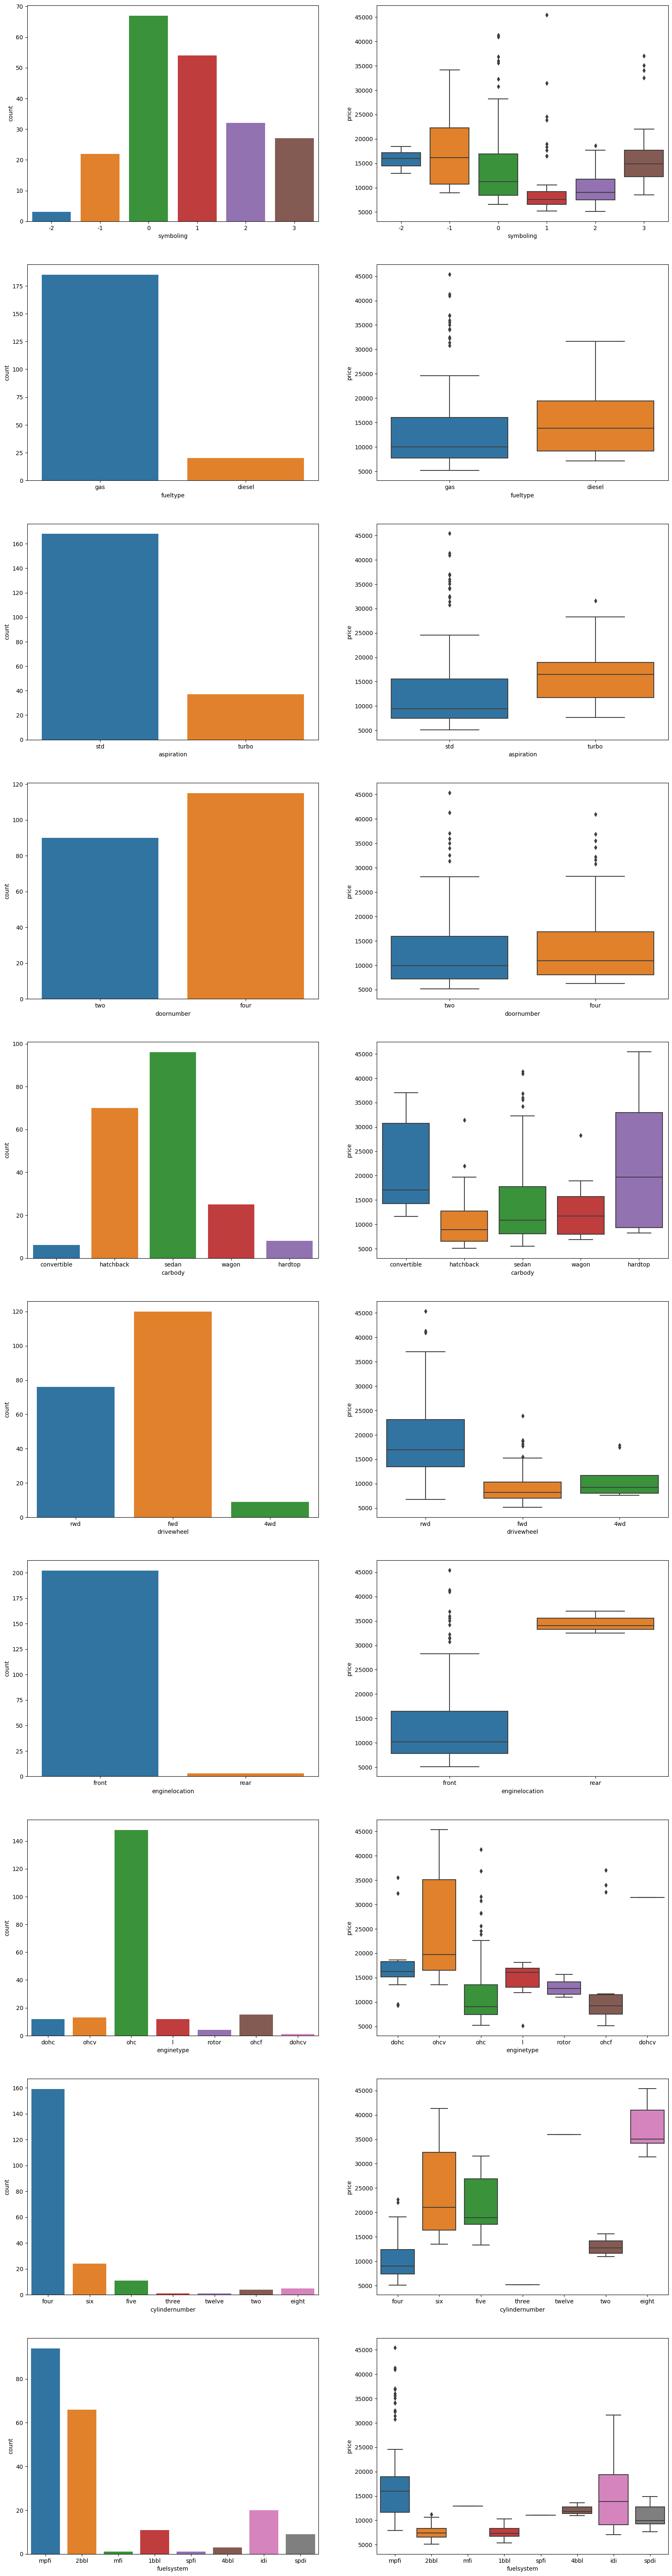

In [10]:
fig, axes = plt.subplots(10, 2, figsize=(20, 80))

i = 0; j = 0

for column in catvar:
    
    ax = sns.countplot(x = column, data = cpdata, ax = axes[i][0])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    
    sns.boxplot(data = cpdata, x = column, y = 'price', ax = axes[i][1])
    i = i + 1
    
plt.show()

<font color = 'red'> __Insights:__ </font>

 1. cars with fueltype = diesel is priced a bit high
 2. cars with aspiration = turbo are priced a bit high
 3. number of doors in the car does not influence price
 4. carbody = convertible are priced high
 5. carbody = hardtop: the prices vary a lot
 6. pricing on rear wheel drive is much higher compared to front wheel drive
 7. cylindernumber = eight or twelve are priced high
 8. fuelsystem = mpfi has lot of outliers at high price

|Variable|Description|Unique Values|Mode|Null Values|
|:---|:---|:---|:---|:---|
|symboling|Insurance Car Rating|3, 2, 1, 0, -1, -2, -3 ; +3 indicates risky -3 indicates safety|0|No Null Values|
|fueltype|Type of Fuel|gas or diesel|gas|No Null Values|
|aspiration|Aspiration|std or turbo|std|No Null Values|
|doornumber|Number of doors in the car|four or two|four|No Null Values|
|enginelocation|Engine Location|front or rear|front|No Null Values|
|drivewheel|Type of Drivewheel|fwd, rwd, 4wd|fwd|No Null Values|
|carbody|Body of the car|sedan, hatchback, wagon, hardtop or convertible|sedan|No Null Values|
|enginetype|Engine Type|dohc, dohcv, l, ohc, ohcf, ohcv, rotor|ohc|No Null Values|
|cylindernumber|Number of Cylinders in the car|two, three, four, five, six, eight, twelve|four|No Null Values|
|fuelsystem|Fuel System used in the car|1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi|mpfi|No Null Values|

## 1.3 Data Visualization - Numeric Variables

In [11]:
numvar = ['wheelbase', 'carlength', 'carwidth', 'carheight', 
          'curbweight', 'enginesize', 'boreratio', 'stroke', 
          'compressionratio', 'horsepower', 'peakrpm', 'citympg', 
          'highwaympg', 'price']

For the above numeric variables, the following plots are shown:

 - __Box Plot__ (that shows the outliers and how the values are distributed) - Univariate
 - __Distribution Plot__ (that clearly shows the distribution and the skewness) - Univariate
 - __Regression Plot__ (that depicts the relationship of the variable with the price) - Bivariate

The three plots are shown side by side for each variable.

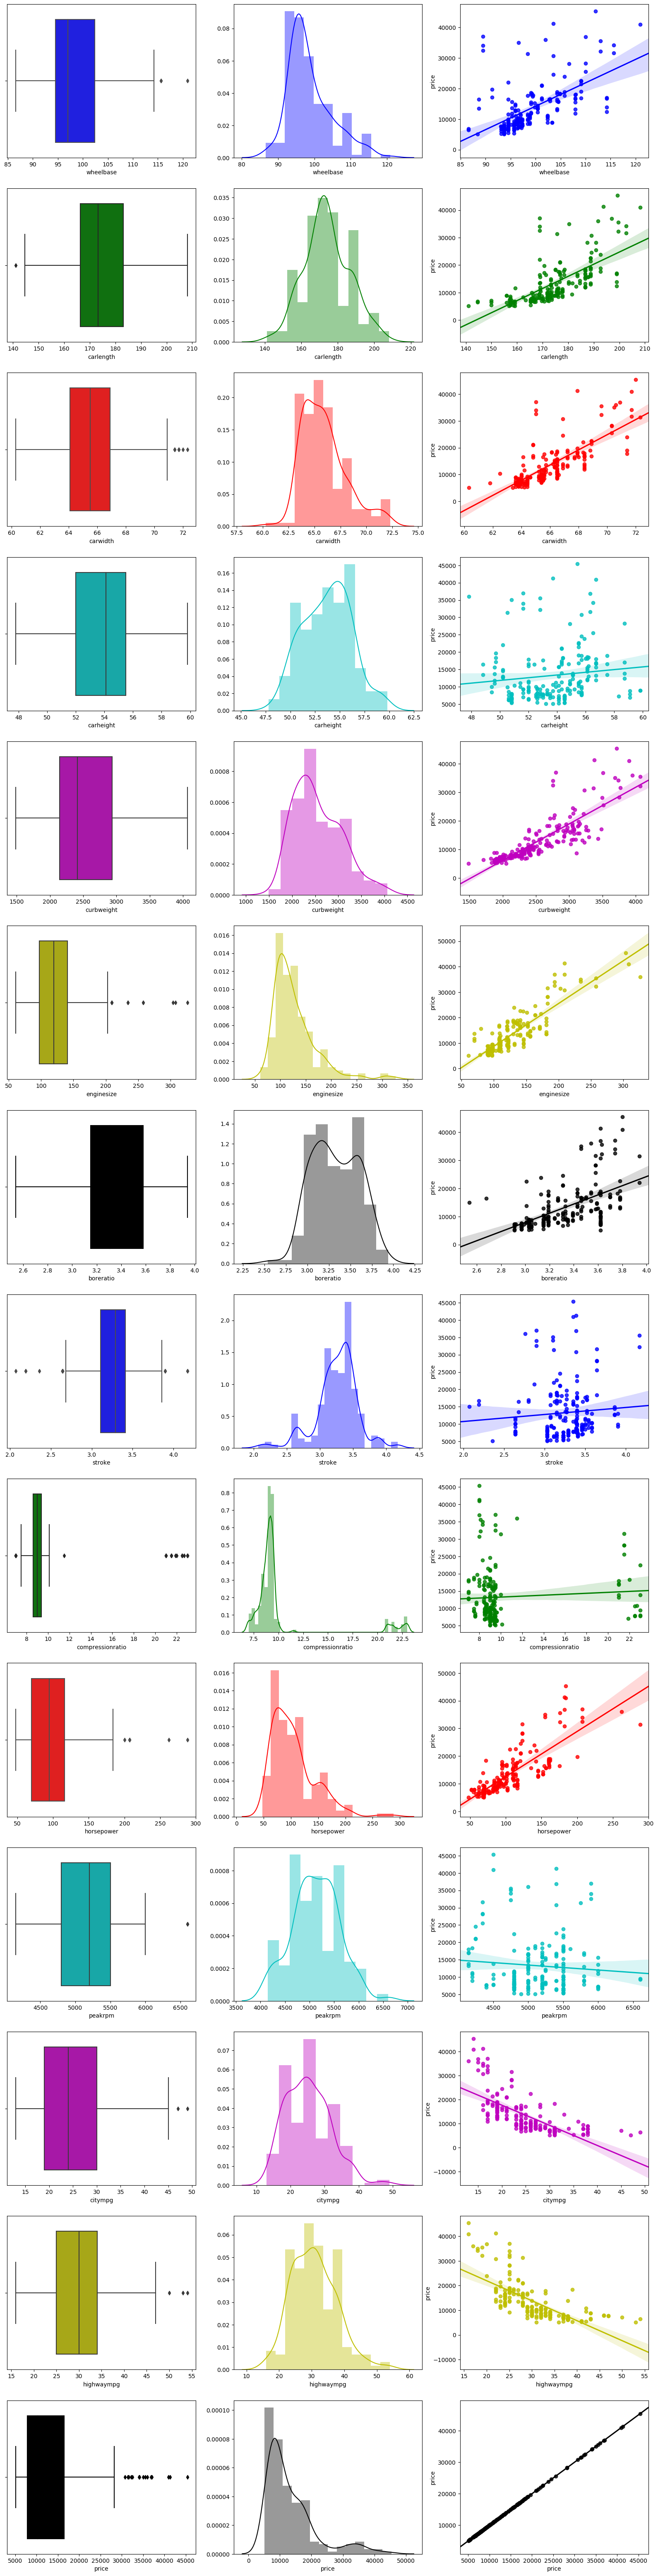

In [12]:
fig, axes = plt.subplots(14, 3, figsize=(20, 80))

i = 0; j = 0

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for column in numvar:
            
    values = cpdata[column]
    palette = (i + j) % 7
    
    sns.boxplot(x = column, data = cpdata, ax = axes[i][j], color = colors[palette])
    sns.distplot(values, hist = True, ax = axes[i][j + 1], color = colors[palette])
    sns.regplot(data = cpdata, x = column, y = 'price', ax = axes[i][j + 2], color = colors[palette])
    
    i = i + 1
    
plt.show()

<font color = 'red'> __Insights:__ </font>

We see a positive correlation of price with carlength, carwidth, curbweight, horsepower, enginesize and wheelbase. The citympg and highwaympg shows a negative correlation with price. And peakrpm, carheight, compressionratio and stroke are showing a weak relationship. But some of these factors that show positive influence on price may themselves be related to each other or can be influencing each other (multicollinearity). We will study this further. 

|Variable|Description|Null Values|Min|Max|Mean|Median|Outliers||Skew|
|:---|:---|:---|---:|---:|---:|---:|:---|:---|:---|
|wheelbase|Wheelbase of car|No null values|86.6|120.9|98.76|97|Values beyond the range [82.65, 114.25]||Skewed Right|
|carlength|Length of car|No null values|141.1|208.1|174.05|173.2|Values beyond the range [141.1, 208.3]|No Outliers|Skewed Right|
|carwidth|Width of car|No null values|60.3|72.3|65.91|65.5|Values beyond the range [59.9, 71.1]||Skewed Right|
|carheight|Height of car|No null values|47.8|59.8|53.72|54.1|Values beyond the range [46.75, 60.75]|No Outliers|Skewed Left|
|curbweight|Weight of car|No null values|1488|4066|2555.57|2414|Values beyond the range [960, 4120]|No Outliers|Skewed Right|
|enginesize|Size of car|No null values|61|326|126.91|120|Values beyond the range [31, 207]||Skewed Right|
|boreratio|Boreratio of car|No null values|2.54|3.94|3.33|3.31|Values beyond the range [2.51, 4.23]|No Outliers|Skewed Right|
|stroke|Volume inside the engine|No null values|2.07|4.17|3.26|3.29|Values beyond the range [2.66, 3.86]||Skewed Left|
|compressionratio|Compression ratio of car|No null values|7|23|10.14|9|Values beyond the range [7.4, 10.6]||Skewed Right|
|horsepower|Horsepower of car|No null values|48|288|104.12|95|Values beyond the range [1, 185]||Skewed Right|
|peakrpm|Peak RPM of car|No null values|4150|6600|5125.12|5200|Values beyond the range [3750, 6550]||Skewed Left|
|citympg|Mileage in city|No null values|13|49|25.22|24|Values beyond the range [2.5, 46.5]||Skewed Right|
|highwaympg|Mileage on highway|No null values|16|54|30.75|30|Values beyond the range [11.5, 47.5]||Skewed Right|
|price|Price of the car|No null values|5118|45400|13276.71|10295|Values beyond the range [-5284.5, 29575.5]||Skewed Right|

## 1.4 Correlation between Numeric Variables

In [13]:
%matplotlib inline

### 1.4.1. Pair Plot for Bivariate Analysis of Numeric Variables

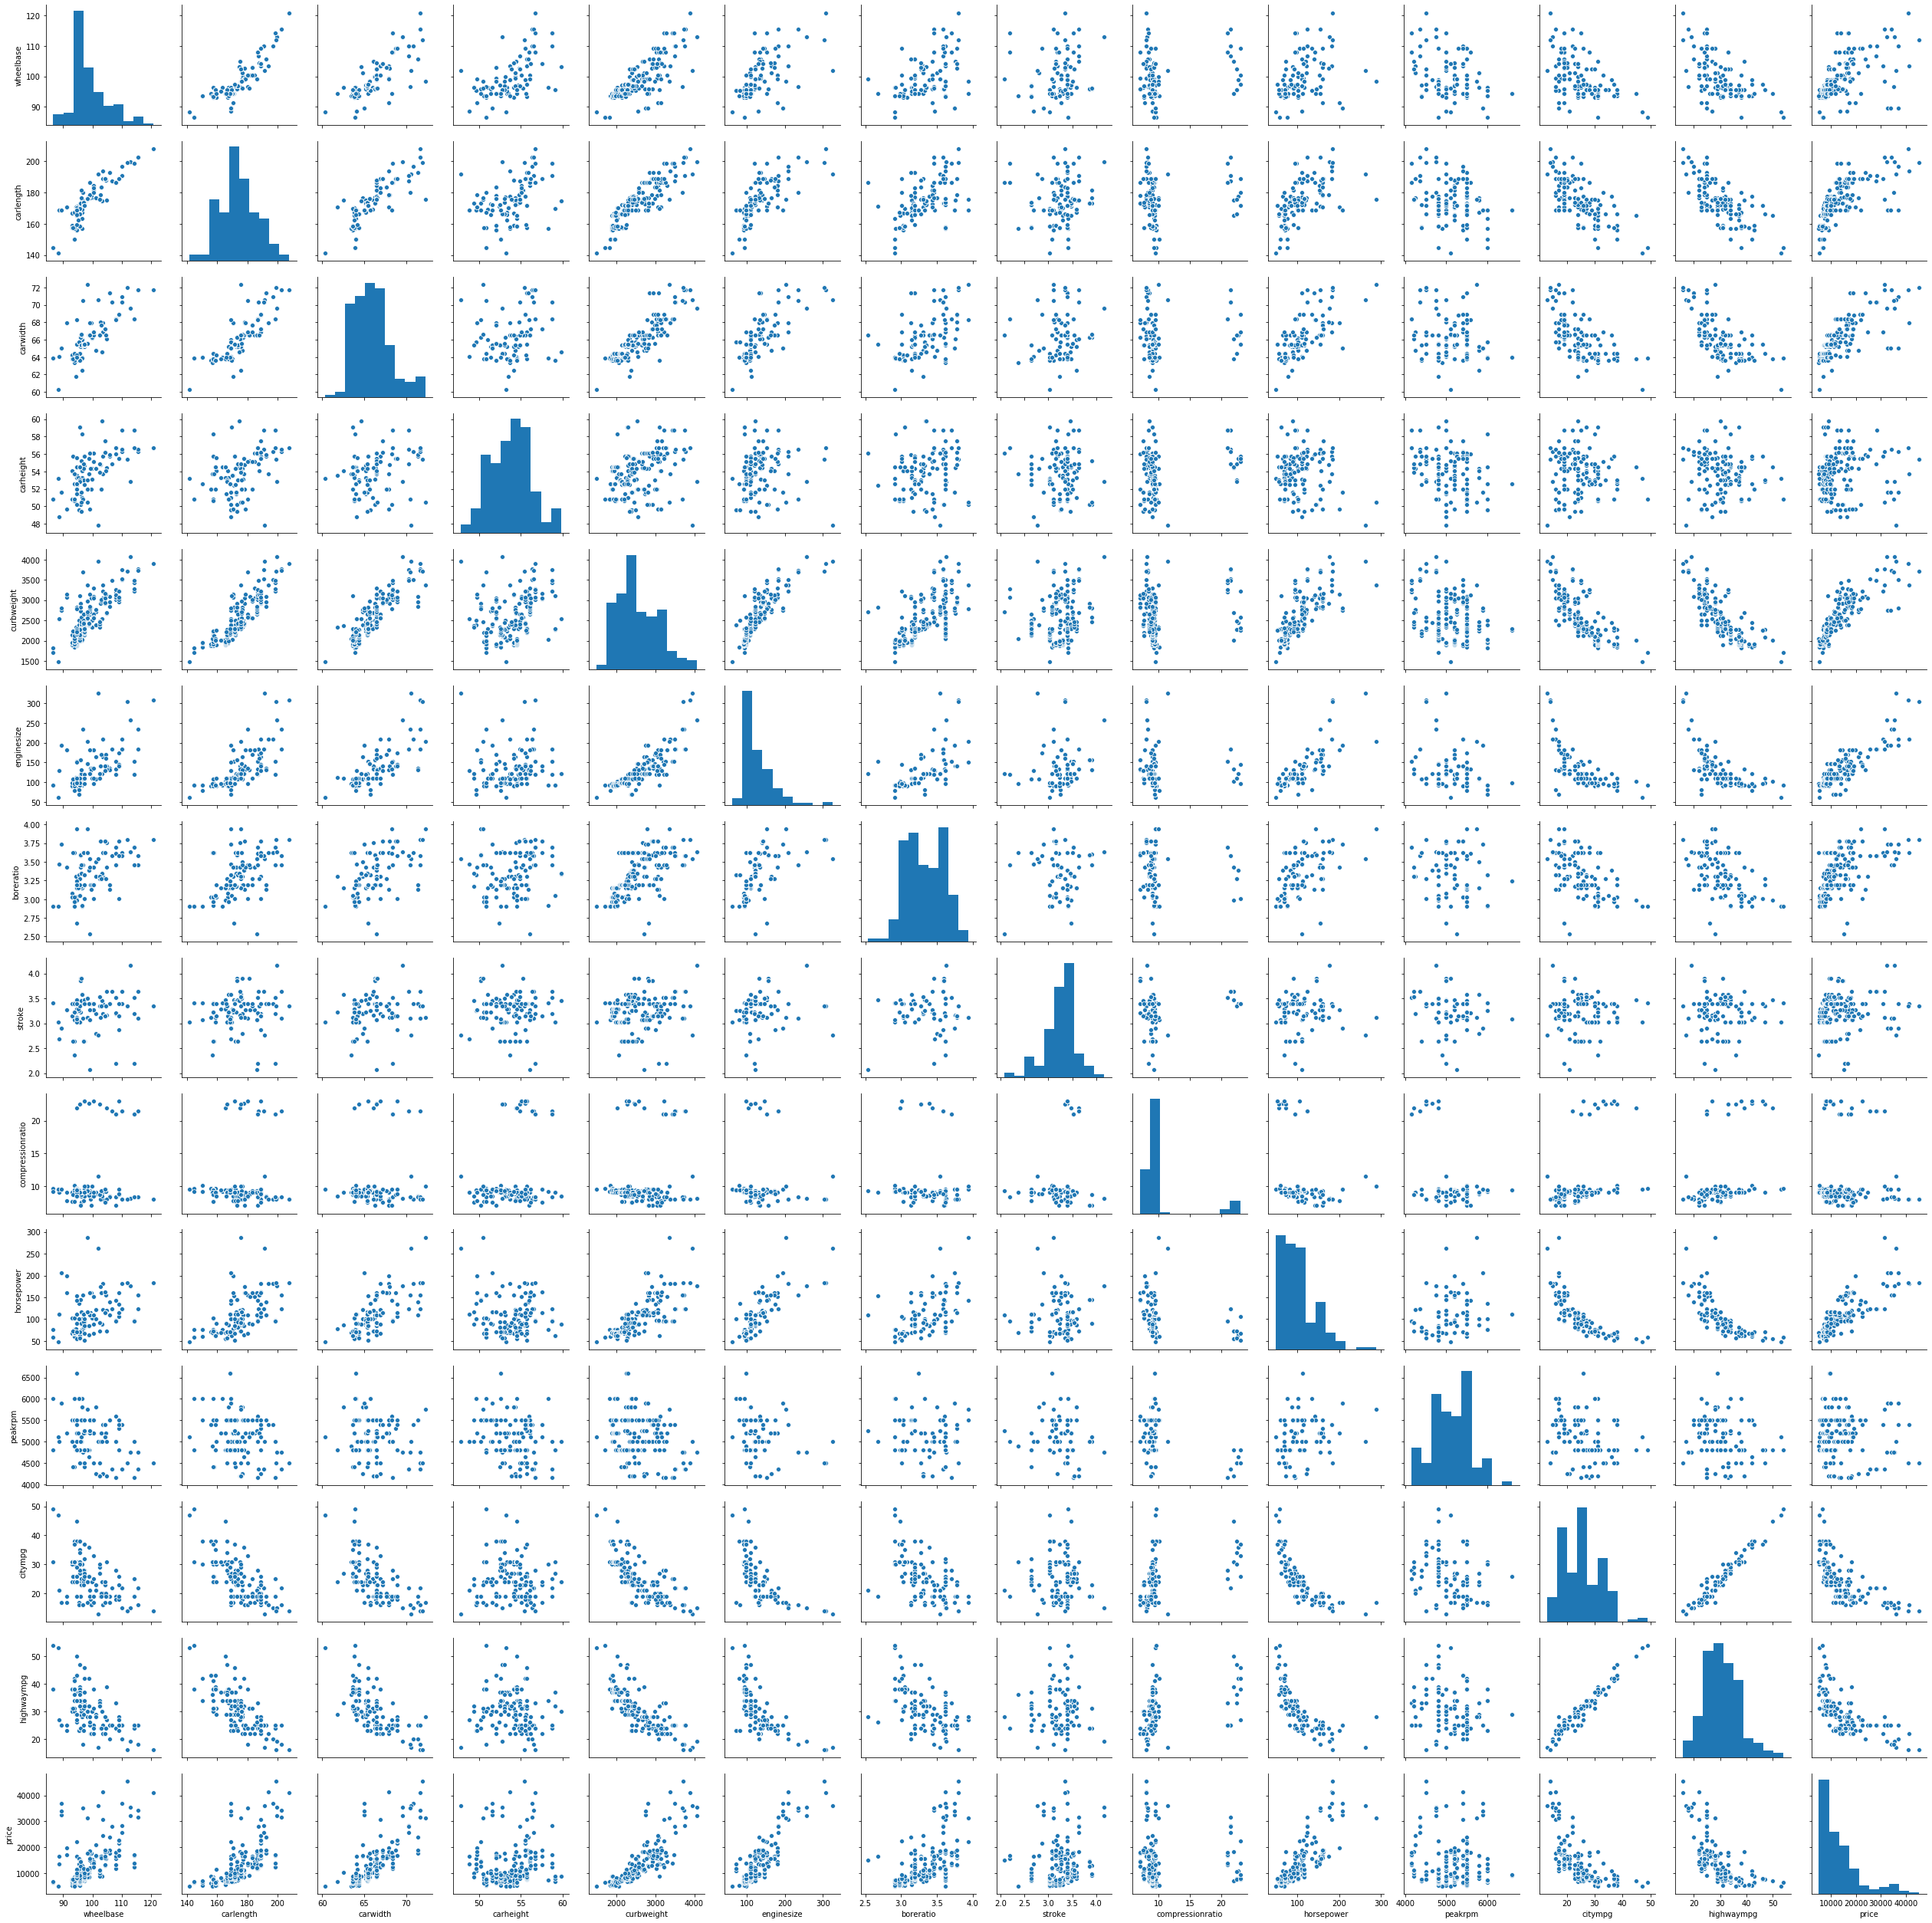

In [14]:
sns.pairplot(data = cpdata, x_vars = numvar, y_vars = numvar)

### 1.4.2 Correlation Heat Map to see how the variables are related to each other

In [15]:
cpcorr = cpdata[numvar].corr()

In [16]:
cpcorr

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


(14.0, 0.0)

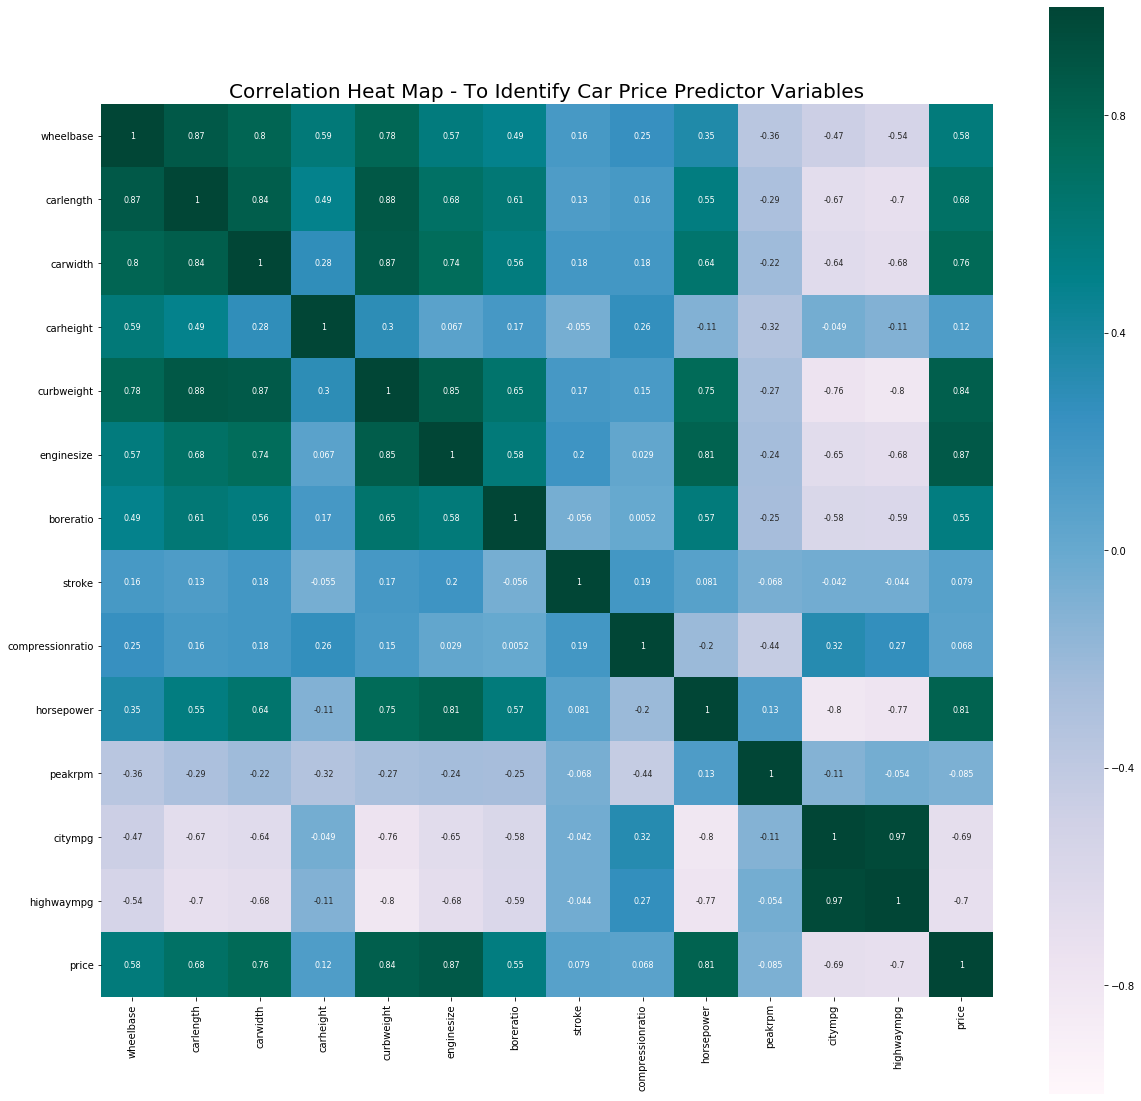

In [17]:
f, ax = plt.subplots(figsize=(20, 20))

heatmap = sns.heatmap(cpcorr, square = True, vmin = -1, vmax = 1,
                      cmap = "PuBuGn", annot = True, annot_kws = {"size": 8})

# add the column names as labels
ax.set_yticklabels(cpcorr.columns, rotation = 0)
ax.set_xticklabels(cpcorr.columns)

# add title to the plot
ax.set_title('Correlation Heat Map - To Identify Car Price Predictor Variables', fontsize = 20)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

# due to a bug in seaborn the first and last row square are getting cut in half - the following code fixes it
bottom, top = ax.get_ylim(); ax.set_ylim(bottom + 0.5, top - 0.5)

__Blue Color indicates a weak relationship. Purple indicates a negative correlation and Green indicates a positive correlation.__ 

Let us study <font color = 'blue'> __how the price is correlated with the other numeric variables__</font>: 

 - enginesize (0.87), curbweight (0.84), horsepower (0.81) has __high positive correlation__ with price.
 - carwidth (0.76), carlength (0.68) are also __moderately correlated__ with price. 
 - carwidth and carlength are also highly correlated with curbweight (0.88 and 0.87 respectively).
 - carheight (0.12), stroke (0.08), compressionratio (0.07) and peakrpm (-0.09) has __very weak correlation__ with price.
 - citympg (-0.69) and highwaympg (-0.7) are __moderately correlated__; but they themselves are highly correlated (0.97)

## 1.5. Multicollinearity

Multicollinearity refers to a situation in which two or more independent variables are highly linearly related. Multicollinearity undermines the statistical significance of an independent variable and hence a problem.

__curbweight__ has strong positive correlation with most of the other variables. And it also has a strong positive correlation with price (0.84). So we can retain this variable and drop all other variables that are strongly correlated to curbweight. We can safely drop the variables __enginesize__, __carlength__ and __carwidth__. Note that the __carlength__ and __carwidth__ are also having a strong positive correlation.

 1. wheelbase and curbweight are highly correlated
 2. horsepower is influenced by factors like enginesize, curbweight, carwidth, boreratio and carlength
 3. enginesize itself is dependent on curbweight, carwidth, carlength and wheelbase
 4. curbweight is strongly correlated with carlength and carwidth
 5. wheelbase influences carwdith, carlength and carheight
 6. boreratio is also somewhat correlated with curbweight, carlength, enginesize and carwidth

---

# 2. Data Preparation

There are 3 major steps in data preparation.

#### A. Car Company

The variable __CarName__ is comprised of two parts:

 - the first word is the name of 'car company' 
 - the second is the 'car model'. 
 
For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. We need to consider only company name (carcompany) as the independent variable for model building. We need to handle this:

 - Extract company name from the car name.
 - Address data quality issues in the company name
 - Categorize them as Economic, MidTier and Luxury cars based on price for further analysis.
 - Check whether there are any outliers in price in each category


#### B. Symboling: 

3, 2, 1, 0, -1, -2, -3 ; +3 indicates risky -3 indicates safety. Categorize the cars as high risk, moderate risk or low risk based on the values.
 
#### C. Dealing with Categorical Variables

The categorical variables are not numeric and cannot be used directly in the model; hence need some treatment. We have to create dummy or indicator variables. If the variable has n distinct values we will create n-1 indicator variables. fueltype
aspiration, doornumber and enginelocation has two values (binary). So we can __map the values to 0 and 1__. 

If there are more than 2 levels in the categorical variable, we have two options: 
 
 - __perform label encoding:__ convert the labels into machine readable numeric form.
 - __create dummies:__ for a categorical variable with n levels, we need to create n-1 dummy variables. The nth variable is redundant and may create multicollinearity issues. In Python, we can use the pd.get_dummies() function to create dummy variables from the data frame.
 
Before creating dummies, to avoid so many columns getting created, we can also remove certain categorical columns (columns with multicollinearity) that will not be used for model building.

In [18]:
cpdf = cpdata.copy()

In [19]:
cpdf.shape

(205, 26)

In [20]:
cpdf.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'], dtype='object')

## 2.1 Company Name

### 2.1.1 Extract Company Name

In [21]:
cpdf['carcompany'] = cpdf['CarName'].str.split().str.get(0)
cpdf['carmodel']   = cpdf['CarName'].str.split(n=1).str.get(1)

In [22]:
cpdf['carcompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

### 2.1.1 Address Data Quality Issues with Company Name

There are certain <font color = 'red'>__data quality issues__</font> that need to be addressed here. The company names are spelt wrong in some cases. 

The following corrections are required:

1. toyouta -> toyota
2. maxda -> mazda
3. porcshce -> porsche
4. vokswagen, vw -> volkswagen

In [23]:
cpdf['carcompany'] = cpdf['carcompany'].str.lower() # convert everything to lowercase

cpdf['carcompany'] = cpdf['carcompany'].str.replace('vw','volkswagen')
cpdf['carcompany'] = cpdf['carcompany'].str.replace('vokswagen','volkswagen')
cpdf['carcompany'] = cpdf['carcompany'].str.replace('toyouta','toyota')
cpdf['carcompany'] = cpdf['carcompany'].str.replace('porcshce','porsche')
cpdf['carcompany'] = cpdf['carcompany'].str.replace('maxda','mazda')

### 2.1.3. Visualize the Distribution

We will use frequency plot to see the distribution of categorical variable and box plot to see how is price is distributed for each of the companies.

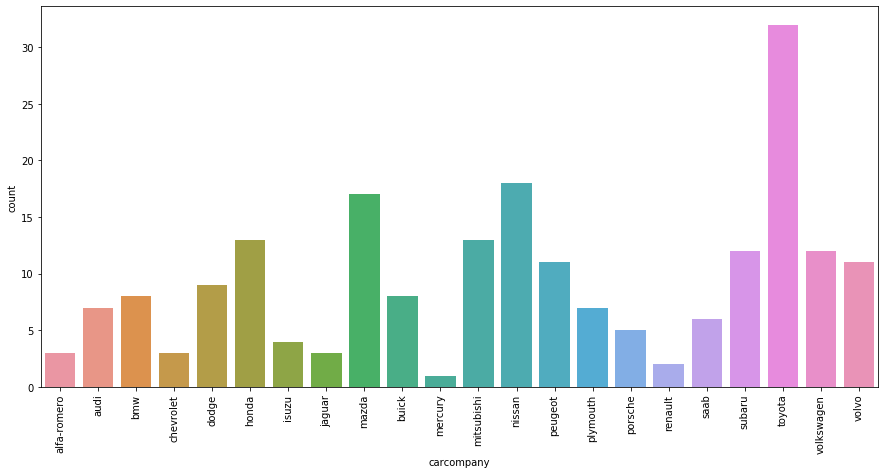

In [24]:
plt.figure(figsize=(15,7))
ax = sns.countplot(x = 'carcompany', data = cpdf)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

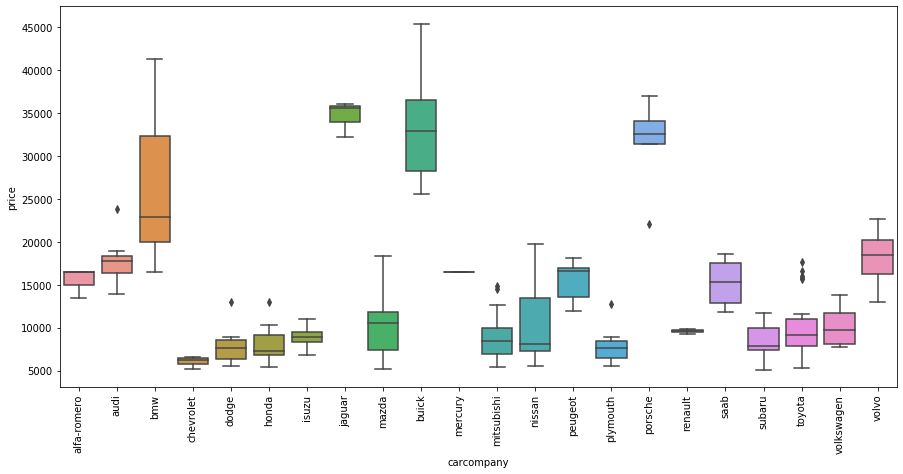

In [25]:
plt.figure(figsize=(15,7))
ax = sns.boxplot(data = cpdf, x = 'carcompany', y = 'price')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

### 2.1.4. Categorization of Company based on Price

It may not be intuitive to use all these different names of companies in building the model. So we will categorize them as Economy (< 10000), MidTier (between 10001 and 20000) and Luxury (> 20000) based on price.

In [26]:
lbls = ['Economic', 'MidTier', 'Luxury']
bins = [0, 10000, 20000, 50000]

cpdf['category'] = pd.cut(cpdf.price, bins, labels = lbls).astype(str)

In [27]:
cpdf['category'].value_counts()

Economic    100
MidTier      79
Luxury       26
Name: category, dtype: int64

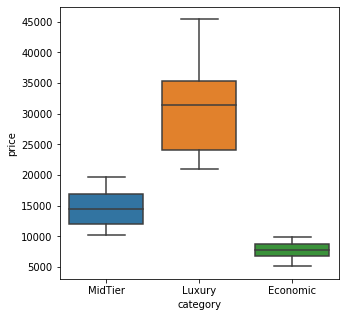

In [28]:
plt.figure(figsize=(5, 5))
sns.boxplot(data = cpdf, x = 'category', y = 'price')

### 2.1.5 Checking for Outliers in Price

Having categorized the cars into three buckets - Economy, Mid Tier and Luxury - we will see whether there are any outliers in each of these categories. If we take the entire data and check for outliers, the luxury cars will be showing up as outliers, but actually they are not. We see that the price distribution is almost uniformly distributed without outliers. __There is no need to remove any outliers.__

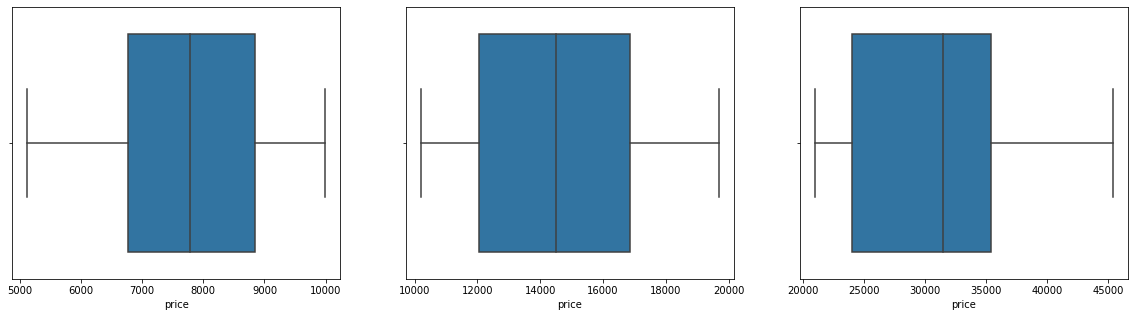

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.boxplot(data = cpdf[cpdf['category'] == 'Economic'], x = 'price', ax = axes[0])
sns.boxplot(data = cpdf[cpdf['category'] == 'MidTier'] , x = 'price', ax = axes[1])
sns.boxplot(data = cpdf[cpdf['category'] == 'Luxury']  , x = 'price', ax = axes[2])

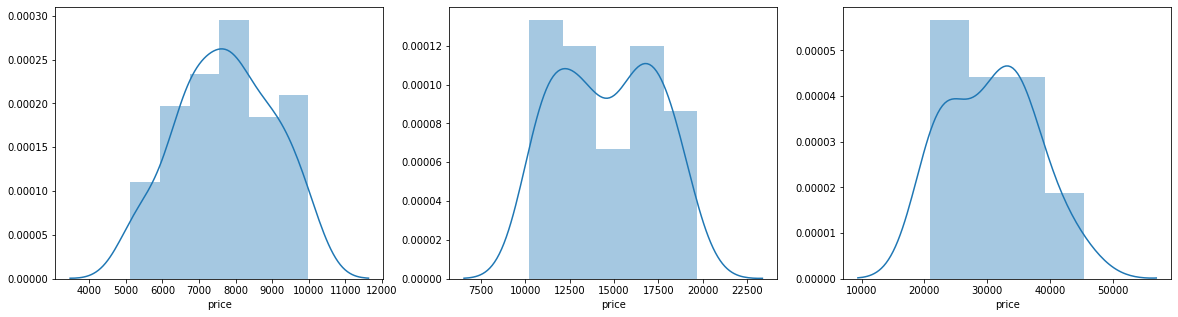

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.distplot(cpdf[cpdf['category'] == 'Economic']['price'], hist = True, ax = axes[0])
sns.distplot(cpdf[cpdf['category'] == 'MidTier']['price'] , hist = True, ax = axes[1])
sns.distplot(cpdf[cpdf['category'] == 'Luxury']['price'],   hist = True, ax = axes[2])

## 2.2 Symboling - Risk Categorization

In [31]:
# Let us categorize the cars based on the symboling field as Risk = 'Low', 'Moderate', 'High'.

lbls = ['Low', 'Moderate', 'High']
bins = [-3, -2, 2, 3]
cpdf['risk'] = pd.cut(cpdf['symboling'], bins, labels = lbls).astype(str)

In [32]:
cpdf['risk'].value_counts()

Moderate    175
High         27
Low           3
Name: risk, dtype: int64

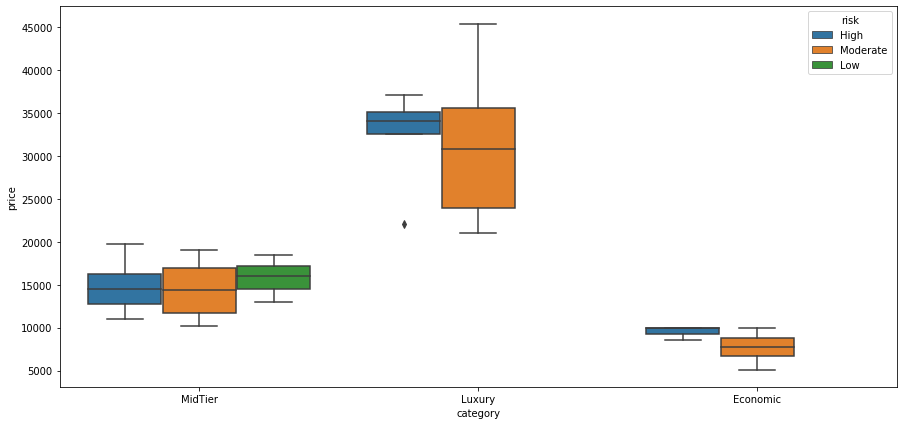

In [33]:
plt.figure(figsize=(15, 7))
sns.boxplot(data = cpdf, x = 'category', y = 'price', hue = 'risk')

In economic category, the sample data has moderate and high risk cars; but the price of high risk car is bit high. In midtier, we see that the the risk level did not influence the price much. In luxury cars also there are no samples with low risk, but irrespective of moderate or high risk, the car price stays high. This may not be a influencer of price.

## 2.3. Mapping Binary Values to 0 and 1

|Variable|Description|Values|Null Values|
|:---|:---|:---|:---|
| fueltype       | Car Fuel Type             | Gas (185 records) & Diesel (20 records) | No null values | 
| aspiration     | Aspiration used in a car  | std (168 records) & turbo (37 records)  | No null values | 
| enginelocation | Location of car engine    | front (202) & rear (3)                  | No null values | 

In [34]:
# fuel type: Map gas to 1 and diesel to 0

cpdf['fueltype'] = cpdf['fueltype'].map({'gas': 1, 'diesel': 0})

# aspiration: Map std to 1 and turbo to 0

cpdf['aspiration'] = cpdf['aspiration'].map({'std': 1, 'turbo': 0})

# enginelocation: Map front to 1 and rear to 0

cpdf['enginelocation'] = cpdf['enginelocation'].map({'front': 1, 'rear': 0})

# doornumber: Map four to 1 and two to 2

cpdf['doornumber'] = cpdf['doornumber'].map({'four': 1, 'two': 2})

The __cylindernumber__ can be mapped to corresponding numeric values and later we can normalize them for building the model.

In [35]:
# cylindernumber: ['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'] Map to numeric values 

cpdf['cylindernumber'] = cpdf['cylindernumber'].map({'twelve' : 12, 'eight' : 8, 'six' : 6, 'five' : 5, 
                                                     'four'   : 4,  'three' : 3, 'two' : 2})

## 2.5 Dropping Features not required for Model Building

Before creating dummies, to avoid so many columns getting created, let us remove certain categorical columns that will not be used for model building. We can drop the fields car_ID, symboling, CarName, carcompany, carmodel. Note that we have already mapped symboling to risk and carcompany to category. The numeric variables enginesize, carlength and carwidth (highly correlated with curbweight) and citympg (highly correlated with highwaympg) can be dropped. Further carheight (0.12), stroke (0.08), compressionratio (0.07) and peakrpm (-0.09) have very weak correlation with price and need not be considered for model building.

In [36]:
# Categorical columns not required for model building

cpdf.drop(columns = ['car_ID', 'symboling', 'CarName', 'carcompany', 'carmodel'], axis = 1, inplace = True)

In [37]:
# Drop because of Multicollinearity

cpdf.drop(columns = ['highwaympg', 'carlength', 'carwidth', 'enginesize'], axis = 1, inplace = True)

In [38]:
# Numerical variables with weak correlation with price

cpdf.drop(columns = ['carheight', 'stroke', 'compressionratio', 'peakrpm'], axis = 1, inplace = True)

In [39]:
cpdf.columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'curbweight', 'enginetype', 'cylindernumber', 'fuelsystem', 'boreratio', 'horsepower', 'citympg', 'price', 'category', 'risk'], dtype='object')

## 2.6 Creating Dummy for Categorical Variables with more than 2 levels

|Variable|Description|Unique Values|Mode|Null Values|
|:---|:---|:---|:---|:---|
|risk|Derived based on symboling|High, Moderate, Low|Moderate|No Null Values|
|category|Derived based on company name|Economic, MidTier, Luxury|Economic|No Null Values|
|drivewheel|Type of Drivewheel|fwd, rwd, 4wd|fwd|No Null Values|
|carbody|Body of the car|sedan, hatchback, wagon, hardtop or convertible|sedan|No Null Values|
|enginetype|Engine Type|dohc, dohcv, l, ohc, ohcf, ohcv, rotor|ohc|No Null Values|
|fuelsystem|Fuel System used in the car|1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi|mpfi|No Null Values|

In [40]:
cpdf = pd.get_dummies(cpdf, drop_first = True)

In [41]:
cpdf.head(5)

,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,cylindernumber,boreratio,horsepower,citympg,price,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,category_Luxury,category_MidTier,risk_Low,risk_Moderate
0,1,1,2,1,88.6,2548,4,3.47,111,21,13495.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,1,1,2,1,88.6,2548,4,3.47,111,21,16500.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,1,1,2,1,94.5,2823,6,2.68,154,19,16500.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1
3,1,1,1,1,99.8,2337,4,3.19,102,24,13950.0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1
4,1,1,1,1,99.4,2824,5,3.19,115,18,17450.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1


In [42]:
# Rearranging the columns

cpdf = cpdf[['category_Luxury', 'category_MidTier', 'risk_Low', 'risk_Moderate',
                   'fueltype', 'aspiration', 'doornumber', 'enginelocation', 
                   'wheelbase', 'curbweight', 'cylindernumber', 'boreratio', 'horsepower', 'citympg', 
                   'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 
                   'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l',  
                   'enginetype_ohc','enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor', 
                   'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi', 
                   'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi', 'price'
                 ]]

---

# 3. Model Buidling

## 3.1 Splitting the Dataset (Train-Test)

Now that we have understood the data, addressed the data quality issues and had sufficiently dealt with the categorical variables, we are ready to perform the linear regression. The first step of performing regression is to split the data set into train data and test data. The algorithm learns from the train data to get deeper understanding on the target variable (price) and uncovers patterns and relationships with other features in the dataset.

In [43]:
import sklearn as skl
from sklearn.model_selection import train_test_split

In [44]:
np.random.seed(0)

In [45]:
cptrain, cptest = train_test_split(cpdf, train_size = 0.7, test_size = 0.3, random_state = 100)

In [46]:
cptrain.shape

(143, 34)

In [47]:
cptest.shape

(62, 34)

## 3.2 Rescaling the Features 

Scaling doesn't impact our model. So we need to rescale the variables so that they have a comparable scale. Otherwise, the coefficients obtained while fitting the regression model might be very large or very small as compared to the other coefficients. There are two methods of scaling that we can go for:

 - __Standardization__ - (x - mu) / sigma - mu = 0 and sigma = 1
 - __Normalization__ - (x - xmin) / (xmax - xmin) - between -1 and 1
 
Here we apply normalization (Max Min Scaling). The max min scaling can be applied on the numeric variables so that we get a normalized value between 0 and 1 for these variables. 

Note: Scaling should be performed after removing the test set from the entire dataset.

In [48]:
cptrain.columns

Index(['category_Luxury', 'category_MidTier', 'risk_Low', 'risk_Moderate', 'fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase', 'curbweight', 'cylindernumber', 'boreratio', 'horsepower', 'citympg', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi', 'price'], dtype='object')

In [49]:
# Rearranging the columns

cptrain = cptrain[['category_Luxury', 'category_MidTier', 'risk_Low', 'risk_Moderate',
                   'fueltype', 'aspiration', 'doornumber', 'enginelocation', 
                   'wheelbase', 'curbweight', 'cylindernumber', 'boreratio', 'horsepower', 'citympg', 
                   'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 
                   'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l',  
                   'enginetype_ohc','enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor', 
                   'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi', 
                   'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi', 'price'
                 ]]

In [50]:
from sklearn.preprocessing import MinMaxScaler

# We apply rescaling on the following numeric variables

features = ['wheelbase', 'curbweight', 'cylindernumber', 'boreratio', 'horsepower', 'citympg', 'price']

scaler = MinMaxScaler()

cptrain[features] = scaler.fit_transform(cptrain[features])

In [51]:
cptrain.head()

,category_Luxury,category_MidTier,risk_Low,risk_Moderate,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,cylindernumber,boreratio,horsepower,citympg,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,price
122,0,0,0,1,1,1,1,1,0.244828,0.272692,0.2,0.230159,0.083333,0.500000,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0.068818
125,1,0,0,0,1,1,2,1,0.272414,0.500388,0.2,1.000000,0.395833,0.166667,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0.466890
166,0,0,0,1,1,1,2,1,0.272414,0.314973,0.2,0.444444,0.266667,0.361111,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.122110
1,0,1,0,0,1,1,2,1,0.068966,0.411171,0.2,0.626984,0.262500,0.222222,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.314446
199,0,1,0,1,1,0,1,1,0.610345,0.647401,0.2,0.746032,0.475000,0.111111,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0.382131


In [52]:
cptrain.shape

(143, 34)

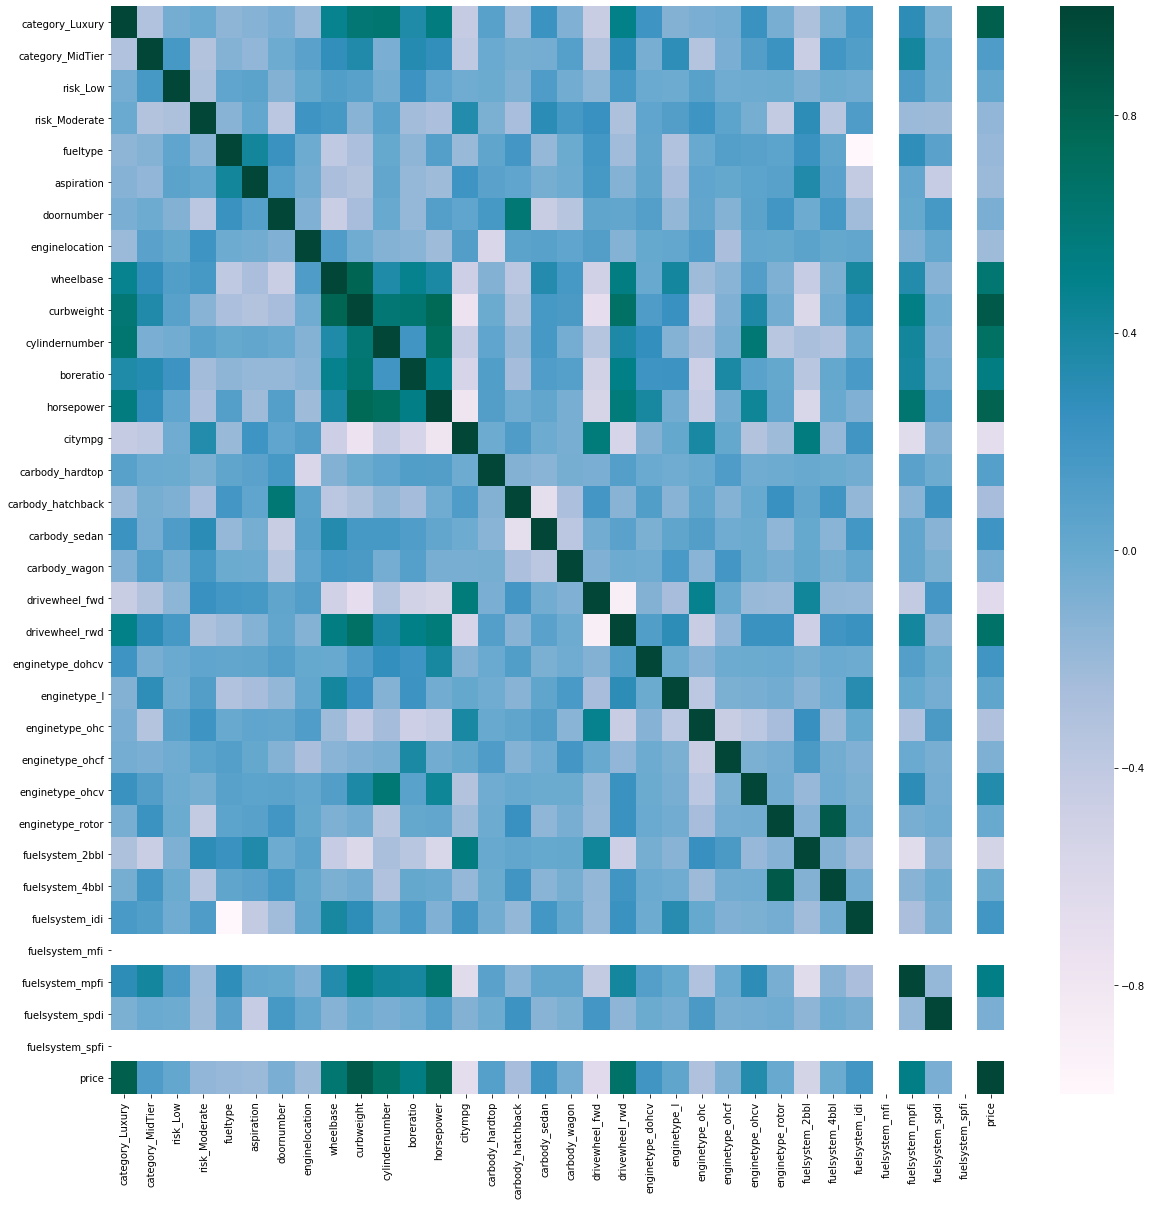

In [53]:
f, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(cptrain.corr(), annot = False, cmap = "PuBuGn")
bottom, top = ax.get_ylim(); ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

__We can see that category_Luxury, curbweight, horsepower, drivewheel_rwd are some of the significant variables that are highly correlated with price. Let us apply statistical models to verify and validate.__

__Splitting the Train Data into X and y sets for Modeling__

In [54]:
y_train = cptrain.pop('price')
X_train = cptrain

## 3.3 Recursive Feature Elimination

Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached. Since in our dataset we have 33 features, selecting them manually, one by one, or taking all the features and eliminating them one by one is not feasible. So we will use RFE to choose 10 features that are significant.

In [55]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [56]:
# Running RFE with the output number of the variable equal to 10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [57]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('category_Luxury', True, 1),
 ('category_MidTier', False, 19),
 ('risk_Low', False, 15),
 ('risk_Moderate', False, 11),
 ('fueltype', False, 14),
 ('aspiration', False, 9),
 ('doornumber', False, 18),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('curbweight', True, 1),
 ('cylindernumber', False, 6),
 ('boreratio', False, 8),
 ('horsepower', True, 1),
 ('citympg', False, 2),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 16),
 ('drivewheel_rwd', False, 17),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 7),
 ('enginetype_ohc', False, 4),
 ('enginetype_ohcf', False, 5),
 ('enginetype_ohcv', False, 20),
 ('enginetype_rotor', False, 3),
 ('fuelsystem_2bbl', False, 21),
 ('fuelsystem_4bbl', False, 12),
 ('fuelsystem_idi', False, 10),
 ('fuelsystem_mfi', False, 23),
 ('fuelsystem_mpfi', False, 22),
 ('fuelsystem_spdi', False, 13),
 ('fuelsystem_spfi', False, 24)]

In [58]:
col = X_train.columns[rfe.support_]

In [59]:
col

Index(['category_Luxury', 'enginelocation', 'wheelbase', 'curbweight', 'horsepower', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'enginetype_dohcv'], dtype='object')

__These are 10 features selected after the recursive feature elimination for model building.__

In [60]:
X_train_rfe = X_train[col]

In [61]:
X_train_rfe.shape

(143, 10)

In [62]:
X_train_rfe.head(5)

,category_Luxury,enginelocation,wheelbase,curbweight,horsepower,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohcv
122,0,1,0.244828,0.272692,0.083333,0,0,1,0,0
125,1,1,0.272414,0.500388,0.395833,0,1,0,0,0
166,0,1,0.272414,0.314973,0.266667,0,1,0,0,0
1,0,1,0.068966,0.411171,0.262500,0,0,0,0,0
199,0,1,0.610345,0.647401,0.475000,0,0,0,1,0


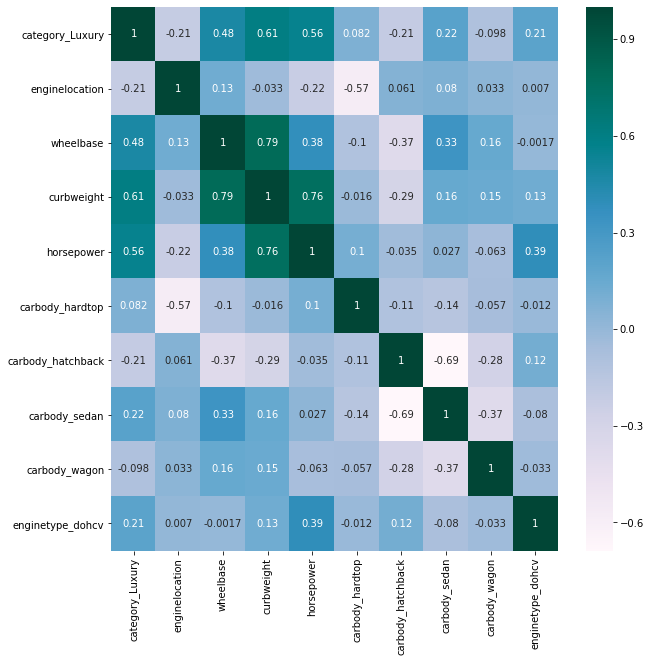

In [63]:
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(X_train_rfe.corr(), annot = True, cmap = "PuBuGn")
bottom, top = ax.get_ylim(); ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

__Note:__ Multicollinearity is observed here in case of wheelbase, curbweight and horsepower (correlation > 0.75).

## 3.4 Building the Model

### 3.4.1 Model 1 with 10 Features selected by RFE

In [64]:
X_train_lm = sm.add_constant(X_train_rfe) # Adding a constant variable 

In [65]:
lm1 = sm.OLS(y_train, X_train_lm).fit()

In [66]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     180.2
Date:                Fri, 06 Mar 2020   Prob (F-statistic):           7.94e-72
Time:                        11:31:41   Log-Likelihood:                 208.88
No. Observations:                 143   AIC:                            -395.8
Df Residuals:                     132   BIC:                            -363.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2471      0.08

R-squared value is very high (0.932), but this should not become a overfit. We can drop the variables with highest p-value. A p-value > 0.05 is considered insignificant. __wheelbase has p-value of 0.113__ and __enginetype_dohcv has p-value 0.153__. We can complement this information with the VIF (Virtual Inflation Factor). VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. A value < 5 is considered good fit.  

In [67]:
# Calculate the VIFs for the model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,curbweight,53.07
1,enginelocation,38.89
2,wheelbase,26.28
7,carbody_sedan,20.02
4,horsepower,15.39
6,carbody_hatchback,13.99
8,carbody_wagon,5.91
0,category_Luxury,2.14
5,carbody_hardtop,1.42
9,enginetype_dohcv,1.37


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop. But it is not recommended to drop all the columns at once as the value of some variable may drop as we rebuild the model by dropping one of the variable. We will drop enginetype_dohcv and build the model again.

In [68]:
X_train_rfe = X_train_rfe.drop('enginetype_dohcv', axis = 1)

### 3.4.2 Model 2 - After Dropping enginetype_dohcv 

In [69]:
X_train_lm = sm.add_constant(X_train_rfe) # Adding a constant variable 

In [70]:
lm2 = sm.OLS(y_train, X_train_lm).fit()

In [71]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     198.3
Date:                Fri, 06 Mar 2020   Prob (F-statistic):           1.52e-72
Time:                        11:31:41   Log-Likelihood:                 207.76
No. Observations:                 143   AIC:                            -395.5
Df Residuals:                     133   BIC:                            -365.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2650      0.08

__p-value of wheelbase is 0.146 which means that the variable is insignificant in predicting car price.__

In [72]:
# Calculate the VIFs for the model 2

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,curbweight,48.49
1,enginelocation,38.68
2,wheelbase,25.82
7,carbody_sedan,19.84
6,carbody_hatchback,13.92
4,horsepower,12.46
8,carbody_wagon,5.91
0,category_Luxury,2.11
5,carbody_hardtop,1.40


wheelbase also has a high VIF value. So we will remove this and rebuild the model.

In [73]:
X_train_rfe = X_train_rfe.drop('wheelbase', axis = 1)

### 3.4.3 Model 3 - After Dropping wheelbase

In [74]:
X_train_lm = sm.add_constant(X_train_rfe) # Adding a constant variable 

In [75]:
lm3 = sm.OLS(y_train, X_train_lm).fit()

In [76]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     221.0
Date:                Fri, 06 Mar 2020   Prob (F-statistic):           2.85e-73
Time:                        11:31:41   Log-Likelihood:                 206.62
No. Observations:                 143   AIC:                            -395.2
Df Residuals:                     134   BIC:                            -368.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2350      0.08

In [77]:
# Calculate the VIFs for the model 2

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginelocation,36.56
2,curbweight,17.25
6,carbody_sedan,15.69
5,carbody_hatchback,11.87
3,horsepower,8.59
7,carbody_wagon,5.13
0,category_Luxury,2.09
4,carbody_hardtop,1.35


In [78]:
# carbody_hardtop is insignificant with p-value 0.06. Dropping the column

X_train_rfe = X_train_rfe.drop('carbody_hardtop', axis = 1)

### 3.4.4 Model 4 - After Dropping carbody_hardtop

In [79]:
X_train_lm = sm.add_constant(X_train_rfe) # Adding a constant variable 

In [80]:
lm4 = sm.OLS(y_train, X_train_lm).fit()

In [81]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     247.3
Date:                Fri, 06 Mar 2020   Prob (F-statistic):           1.02e-73
Time:                        11:31:42   Log-Likelihood:                 204.73
No. Observations:                 143   AIC:                            -393.5
Df Residuals:                     135   BIC:                            -369.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1358      0.06

In [82]:
# Calculate the VIFs for the model 2

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginelocation,29.58
2,curbweight,16.98
5,carbody_sedan,12.39
4,carbody_hatchback,9.35
3,horsepower,8.31
6,carbody_wagon,4.30
0,category_Luxury,2.09


In [83]:
# carbody_sedan is insignificant - p-value = 0.078

X_train_rfe = X_train_rfe.drop('carbody_sedan', axis = 1)

### 3.4.5 Model 5 - After Dropping carbody_sedan

In [84]:
X_train_lm = sm.add_constant(X_train_rfe) # Adding a constant variable 

In [85]:
lm5 = sm.OLS(y_train, X_train_lm).fit()

In [86]:
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     283.5
Date:                Fri, 06 Mar 2020   Prob (F-statistic):           2.75e-74
Time:                        11:31:42   Log-Likelihood:                 203.08
No. Observations:                 143   AIC:                            -392.2
Df Residuals:                     136   BIC:                            -371.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1349      0.06

In [87]:
# Calculate the VIFs for the model 2

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,16.97
3,horsepower,8.29
1,enginelocation,7.77
0,category_Luxury,2.08
4,carbody_hatchback,1.97
5,carbody_wagon,1.38


In [88]:
# carbody_hatchback is insignificant - p-value = 0.071

X_train_rfe = X_train_rfe.drop('carbody_hatchback', axis = 1)

### 3.4.6 Model 6 - After Dropping carbody_hatchback

In [89]:
X_train_lm = sm.add_constant(X_train_rfe) # Adding a constant variable 

In [90]:
lm6 = sm.OLS(y_train, X_train_lm).fit()

In [91]:
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     333.9
Date:                Fri, 06 Mar 2020   Prob (F-statistic):           7.27e-75
Time:                        11:31:42   Log-Likelihood:                 201.36
No. Observations:                 143   AIC:                            -390.7
Df Residuals:                     137   BIC:                            -372.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1370      0.065     

In [92]:
# Calculate the VIFs for the model 2

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,15.31
3,horsepower,7.55
1,enginelocation,5.74
0,category_Luxury,2.06
4,carbody_wagon,1.33


p-value is low for all the variables; so we will remove variable with high VIF. __VIF of curbweight = 15.31__

In [93]:
X_train_rfe = X_train_rfe.drop('curbweight', axis = 1)

### 3.4.7 Model 7 - After Dropping curbweight

In [94]:
X_train_lm = sm.add_constant(X_train_rfe) # Adding a constant variable 

In [95]:
lm7 = sm.OLS(y_train, X_train_lm).fit()

In [96]:
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     209.9
Date:                Fri, 06 Mar 2020   Prob (F-statistic):           1.28e-57
Time:                        11:31:42   Log-Likelihood:                 156.94
No. Observations:                 143   AIC:                            -303.9
Df Residuals:                     138   BIC:                            -289.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0262      0.087     

In [97]:
# Calculate the VIFs for the model 2

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,horsepower,4.06
1,enginelocation,3.12
0,category_Luxury,1.72
3,carbody_wagon,1.16


p-value is very high for engine location (0.952). 

In [98]:
X_train_rfe = X_train_rfe.drop('enginelocation', axis = 1)

### 3.4.8 Model 8 - After Dropping enginelocation

In [99]:
X_train_lm = sm.add_constant(X_train_rfe) # Adding a constant variable 

In [100]:
lm8 = sm.OLS(y_train, X_train_lm).fit()

In [101]:
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     281.9
Date:                Fri, 06 Mar 2020   Prob (F-statistic):           7.00e-59
Time:                        11:31:42   Log-Likelihood:                 156.94
No. Observations:                 143   AIC:                            -305.9
Df Residuals:                     139   BIC:                            -294.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0209      0.012     

In [102]:
# Calculate the VIFs for the model 2

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,horsepower,1.73
0,category_Luxury,1.62
2,carbody_wagon,1.09


In [103]:
# carbody_wagon has high p-value = 0.279

X_train_rfe = X_train_rfe.drop('carbody_wagon', axis = 1)

### 3.4.9 Model 9 - After Dropping carbody_wagon

In [104]:
X_train_lm = sm.add_constant(X_train_rfe) # Adding a constant variable 

In [105]:
lm9 = sm.OLS(y_train, X_train_lm).fit()

In [106]:
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     421.8
Date:                Fri, 06 Mar 2020   Prob (F-statistic):           5.42e-60
Time:                        11:31:42   Log-Likelihood:                 156.34
No. Observations:                 143   AIC:                            -306.7
Df Residuals:                     140   BIC:                            -297.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0242      0.012     

In [107]:
# Calculate the VIFs for the model 2

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,category_Luxury,1.59
1,horsepower,1.59


The model has R-squared = 0.858

__price = 0.3411 x (category_Luxury) + 0.6483 x (horsepower) + 0.0242__

In [108]:
X_train_rfe.columns

Index(['category_Luxury', 'horsepower'], dtype='object')

---

# 4. Residual Analysis

In linear regression we make certain assumptions on these error terms.
 1. __Normality:__ The error terms are normally distributed with mean = 0. This can be validated by creating a histogram and distribution plot or a q-q plot using matplotlib and seaborn library in Python)
 2. __Independence:__ The error terms are independent of each other. To validate this we create a scatter plot of the error terms and the predicted y values and fitting a regression line. If the error terms do not follow a pattern and are independent of each other the best fit line will be a horizontal line with slope = 0)
 3. __Homoscedasticity:__ The error terms should have a constant variance, which can be validated by creating a scatter plot of the actual y values against the predicted y values.

In [109]:
y_train_pred = lm9.predict(X_train_lm)

Text(0.5, 0, 'Errors')

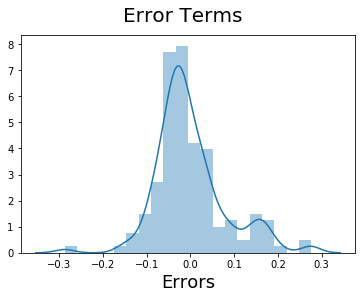

In [110]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                         

Now that we see the error terms are normally distributed with mean = 0, we can move ahead and predict the price for test data.

Text(0.5, 0.98, 'Price: Predicted vs. Actual')

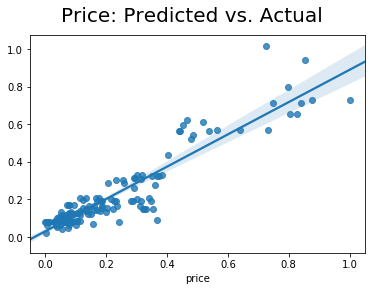

In [111]:
# Plot the scatter plot of actual and predicted price

fig = plt.figure()
sns.regplot(y_train, y_train_pred)
fig.suptitle('Price: Predicted vs. Actual', fontsize = 20)                                        

The regression line (best fit line) represents the data points very well. R-squared = 0.858 indicates that 85% of the variance are explained by the model. Moreover the adjusted R-squared is also 0.856.

Text(0.5, 0.98, 'Predicted Price vs. Error')

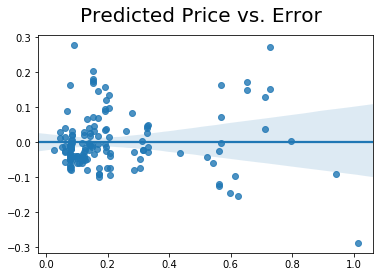

In [112]:
# Plot the scatter plot of predicted price and the Residual

fig = plt.figure()
sns.regplot(y_train_pred, (y_train - y_train_pred))
fig.suptitle('Predicted Price vs. Error', fontsize = 20)                                        

We do not see any patterns here. The residuals do not increase or decrease with the fitted values (predicted values). The regression line is horizontal showing a zero correlation. This means that the assumptions of independence and constant variance is true for the model.

Text(0.5, 0.98, 'Residual Analysis')

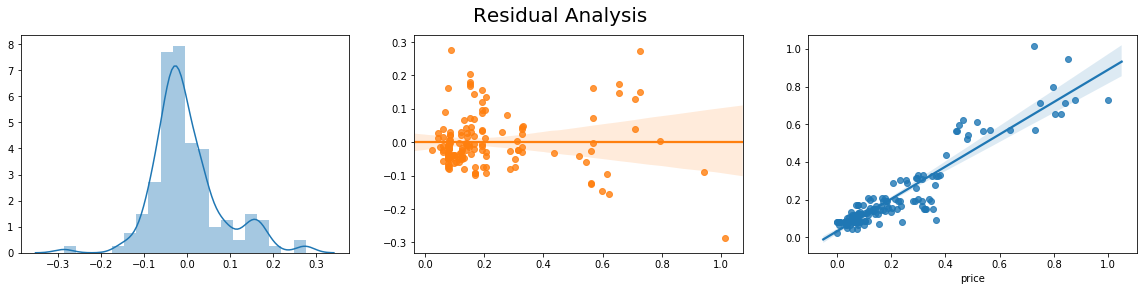

In [113]:
fig, axes = plt.subplots(1, 3, figsize = (20, 4))

sns.distplot((y_train - y_train_pred), bins = 20, ax = axes[0])
sns.regplot(y_train, y_train_pred, ax = axes[2])
sns.regplot(y_train_pred, (y_train - y_train_pred), ax = axes[1])

fig.suptitle('Residual Analysis', fontsize = 20)    

__Thus we have verified the assumptions of normality, independence and constant variance are met.__ Let us now go ahead and use the model for prediction with test data.

((array([-2.58737924, -2.2656706 , -2.08113048, -1.94835608, -1.84304269,
         -1.75491888, -1.678633  , -1.61102627, -1.5500713 , -1.49438581,
         -1.44298316, -1.39513338, -1.35028049, -1.30799079, -1.26791911,
         -1.22978601, -1.19336194, -1.15845585, -1.12490695, -1.09257858,
         -1.06135351, -1.03113038, -1.00182092, -0.97334775, -0.94564261,
         -0.91864496, -0.89230082, -0.86656185, -0.84138457, -0.81672966,
         -0.79256151, -0.76884767, -0.74555851, -0.72266689, -0.70014786,
         -0.67797842, -0.65613731, -0.63460482, -0.61336263, -0.59239368,
         -0.57168204, -0.55121279, -0.53097195, -0.51094635, -0.4911236 ,
         -0.47149199, -0.45204045, -0.43275847, -0.41363607, -0.39466375,
         -0.37583244, -0.35713349, -0.33855859, -0.32009979, -0.30174942,
         -0.28350011, -0.26534474, -0.24727641, -0.22928847, -0.21137441,
         -0.19352793, -0.17574289, -0.15801327, -0.14033318, -0.12269685,
         -0.10509861, -0.08753286, -0.

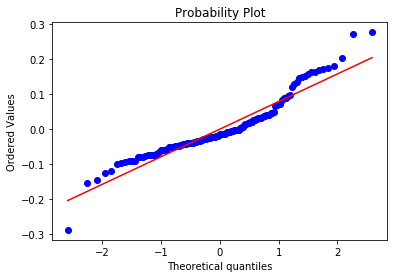

In [114]:
# Creating a Q-Q Plot

import scipy.stats as scs
import matplotlib.pyplot as plt

scs.probplot(y_train - y_train_pred, dist="norm", plot = plt)   

---

# 5. Making Predictions with the Final Model

In [115]:
# Apply rescaling on the following numeric variables in test data

features = ['wheelbase', 'curbweight', 'cylindernumber', 'boreratio', 'horsepower', 'citympg', 'price']

cptest[features] = scaler.transform(cptest[features])

In [116]:
cptest.describe()

,category_Luxury,category_MidTier,risk_Low,risk_Moderate,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,cylindernumber,boreratio,horsepower,citympg,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,price
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.096774,0.435484,0.016129,0.838710,0.887097,0.822581,1.435484,0.967742,0.437764,0.428470,0.232258,0.556580,0.248858,0.328405,0.080645,0.338710,0.451613,0.096774,0.564516,0.419355,0.0,0.048387,0.806452,0.048387,0.064516,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129,0.239439
std,0.298064,0.499868,0.127000,0.370801,0.319058,0.385142,0.499868,0.178127,0.212861,0.179488,0.088288,0.228484,0.163376,0.172009,0.274512,0.477134,0.501716,0.298064,0.499868,0.497482,0.0,0.216335,0.398304,0.216335,0.247676,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000,0.233076
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.128394,0.200000,-0.111111,0.016667,0.027778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.007763
25%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.313793,0.305275,0.200000,0.404762,0.107292,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.092342
50%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.387931,0.406129,0.200000,0.563492,0.218750,0.305556,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000,0.158991
75%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.570690,0.564876,0.200000,0.746032,0.295833,0.444444,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.750000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.317243
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.182759,0.935609,0.600000,0.888889,0.662500,0.694444,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.112855


In [117]:
# Divide the data into X_test and y_test

y_test = cptest.pop('price')
X_test = cptest

In [118]:
X_test = sm.add_constant(X_test)

In [119]:
X_test = X_test[['const', 'category_Luxury', 'horsepower']]

In [120]:
y_pred = lm9.predict(X_test)

Text(0.5, 0.98, 'Price: Predicted vs. Actual')

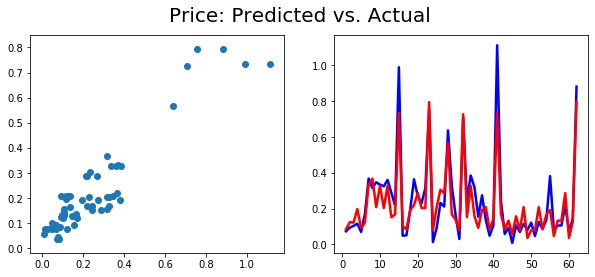

In [121]:
# Let us plot the actual vs. predicted value

fig, axes = plt.subplots(1, 2, figsize = (10, 4))

axes[0].scatter(y_test, y_pred)

c = [i for i in range(1, 63, 1)]
axes[1].plot(c, y_test, color = 'blue', linewidth = 2.5, linestyle = "-")
axes[1].plot(c, y_pred, color = 'red',  linewidth = 2.5, linestyle = "-")

fig.suptitle('Price: Predicted vs. Actual', fontsize = 20)    

Text(0.5, 0.98, 'Residual Analysis')

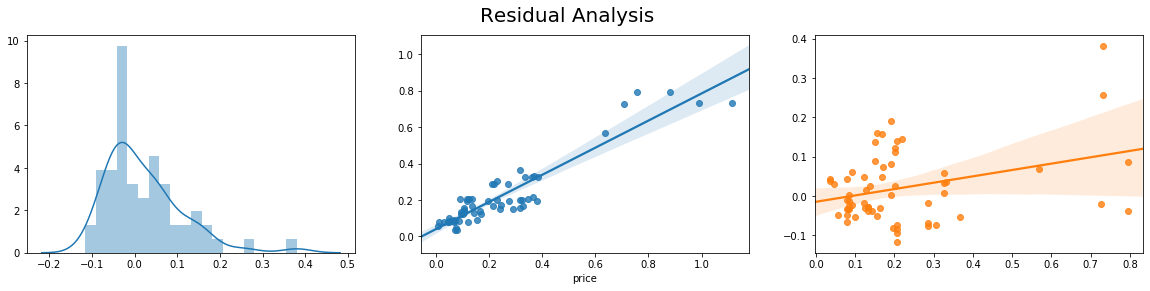

In [122]:
fig, axes = plt.subplots(1, 3, figsize = (20, 4))

sns.distplot((y_test - y_pred), bins = 20, ax = axes[0])
sns.regplot(y_test, y_pred, ax = axes[1])
sns.regplot(y_pred, (y_test - y_pred), ax = axes[2])

fig.suptitle('Residual Analysis', fontsize = 20)    

---

# 6. R2 and Adjusted R2

To summarize, the model 9 is a good fit and can be used for prediction of car prices. 

Let us validate this using the values of R-squared and Adjusted R-squared.

In [123]:
from sklearn.metrics import r2_score

In [124]:
r2_train = r2_score(y_train, y_train_pred) # R-squared for Train Data

In [125]:
r2_test = r2_score(y_test, y_pred) # R-squared for Test Data

In [126]:
adjusted_r2_train = 1 - ((1 - r2_train) * (143 - 1) / (143 - 2 - 1))

In [127]:
adjusted_r2_test = 1 - ((1 - r2_test) * (62 - 1) / (62 - 2 - 1))

In [128]:
print(r2_train, adjusted_r2_train)

0.8576533536742892 0.8556198301553505


In [129]:
print(r2_test, adjusted_r2_test)

0.840999847340057 0.835610011656669


 - R-squared value of the Model on Train Data = 0.858
 - Adjusted R-squared value of the Model on Train Data = 0.856
 - R-squared value of the Model on Test Data = 0.84
 - Adjusted R-squared value of the Model on Train Data = 0.836

The R-squared and Adjusted R-squared are close to each other. So there are no redundant parameters in the model. The R-squared value on the test data is also significantly high and close to the train data. The p-value for the model is very low and the VIF is also less than 5. So these variables describe the price of the cars to a great extent. 

We also confirmed our assumptions on the error terms through residual analysis. The error terms are normally distributed with mean = 0 and also have a constant variance (homoscedasticity) There is no pattern observed as indicated by the plot of error term to predictions had a horizontal regression line. We see a linear relationship between the predictor variable and the target variable and fitted line represents the data perfectly.

The equation of our best-fit line is:

__price = 0.3411 x (category_Luxury) + 0.6483 x (horsepower) + 0.0242__

__Interpretation:__ The car price is more or les dependent on the horsepower with a coefficient 0.6483. In case of luxury cars, there is an additional value 0.3411 getting added with constant coefficient. Note that category_Luxury is a dummy variable and will have value 1 for all the luxury cars. So the beta 0 will be 0.0242 for other category cars (economic and mid-tier) whereas for luxury cars beta 0 will be 0.3653.